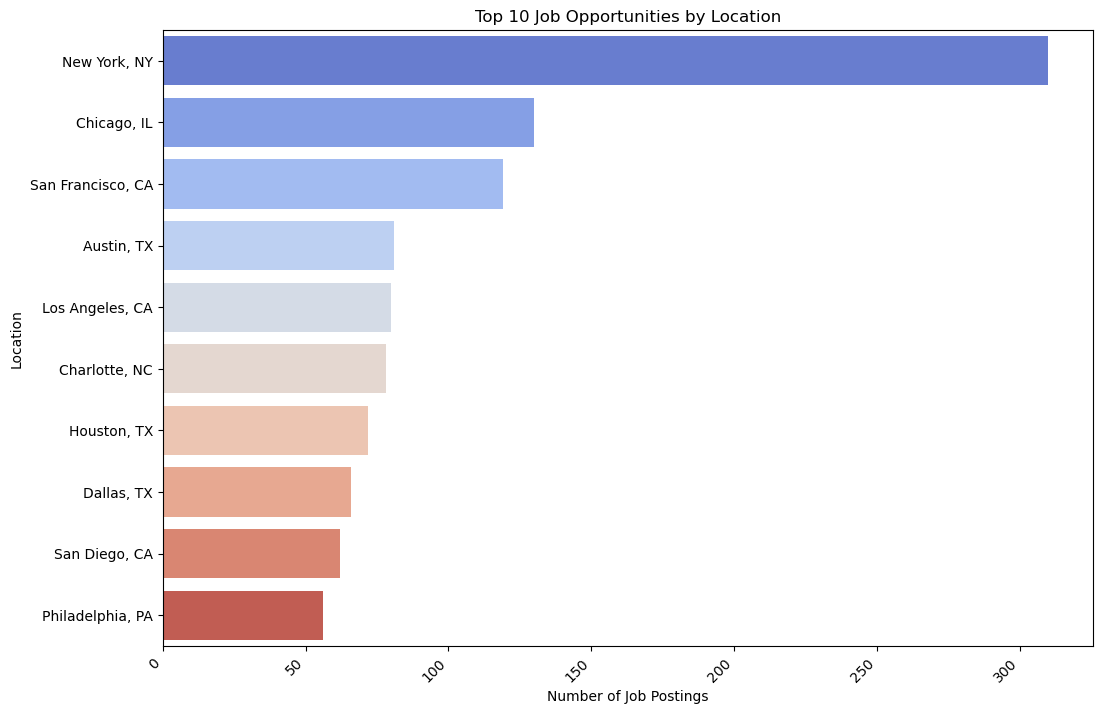

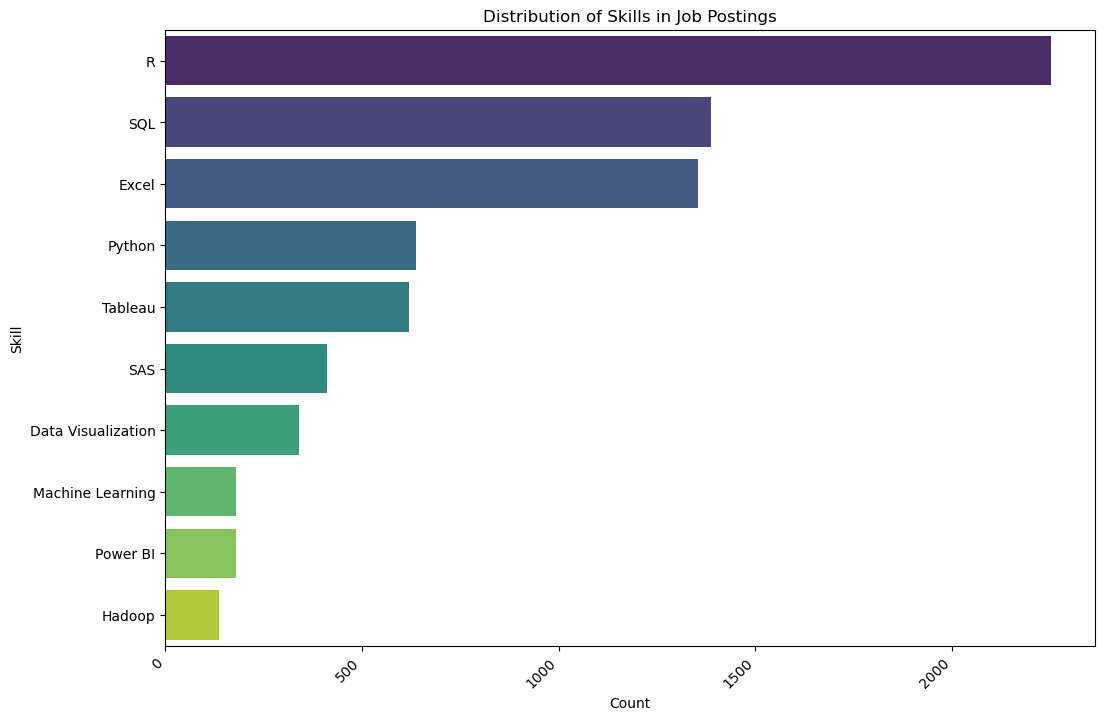

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the dataset
df = pd.read_csv('Data-Analytics.csv')

# Handle missing values
df.dropna(inplace=True)

# Standardize skills (assuming skills keywords are in the job description)
skills_list = ['Python', 'SQL', 'Machine Learning', 'Tableau', 'Power BI', 'Data Visualization', 'Hadoop', 'SAS', 'R', 'Excel']

def extract_skills(description):
    description = description.lower()
    return [skill for skill in skills_list if skill.lower() in description]

df['skills'] = df['Job Description'].apply(extract_skills)

# Flatten the list of skills and count occurrences
all_skills = [skill for sublist in df['skills'] for skill in sublist]
skills_counts = Counter(all_skills)

# Convert skills counts to DataFrame and sort by count in descending order
skills_df = pd.DataFrame.from_dict(skills_counts, orient='index').reset_index()
skills_df.columns = ['Skill', 'Count']
skills_df = skills_df.sort_values(by='Count', ascending=False)  # Ensure descending order

# Standardize job titles
df['Job Title'] = df['Job Title'].str.lower().str.title()

# Standardize salary (removing unwanted characters)
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'[^0-9-]', '', regex=True)

# Split salary into min and max salary
df[['min_salary', 'max_salary']] = df['Salary Estimate'].str.split('-', expand=True)

# Clean and convert to float
df['min_salary'] = df['min_salary'].replace('', '0').astype(float)
df['max_salary'] = df['max_salary'].replace('', '0').astype(float)

# Drop the original Salary Estimate column
df.drop('Salary Estimate', axis=1, inplace=True)

# Analyze the geographical distribution of job opportunities by location
location_counts = df['Location'].value_counts()

# Select top 10 locations
top_10_locations = location_counts.head(10)

# Plot the job opportunities by top 10 locations with increased figure size and spacing
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.barplot(x=top_10_locations.values, y=top_10_locations.index, palette='coolwarm')
plt.title('Top 10 Job Opportunities by Location')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Plot the skills distribution in descending order
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Skill', data=skills_df, palette='viridis')
plt.title('Distribution of Skills in Job Postings')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Export the cleaned data
df.to_csv('Cleaned_Data_Analytics.csv', index=False)